In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Cargar datos desde Excel
archivo = 'Practica_Analisis_Marketing.xlsx'
df = pd.read_excel(archivo, sheet_name='Funnels')


In [24]:
df.head()

,ID_Usuario,Fecha,Fuente,Página_Visitada,Acción_Realizada,Tiempo_en_Sitio,Dispositivo,Conversión
0,U0203,2024-01-27,Facebook,Producto,Añadir al carrito,77.69,Mobile,No
1,U0266,2024-01-27,Facebook,Home,Registro,246.64,Mobile,No
2,U0152,2024-01-21,Orgánico,Producto,Compra,240.83,Desktop,No
3,U0009,2024-01-30,Orgánico,Home,Salir,209.94,Desktop,No
4,U0233,2024-01-28,Facebook,Home,Click,85.28,Tablet,No


In [4]:
# Ver etapas únicas del funnel
print("\nEtapas del funnel:")
print(df['Página_Visitada'].value_counts())


Etapas del funnel:
Página_Visitada
Producto    84
Carrito     78
Home        75
Checkout    63
Name: count, dtype: int64


C:\Users\Axel\AppData\Local\Temp\ipykernel_13760\3023601660.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=usuarios_por_etapa.values, y=usuarios_por_etapa.index, palette='viridis')


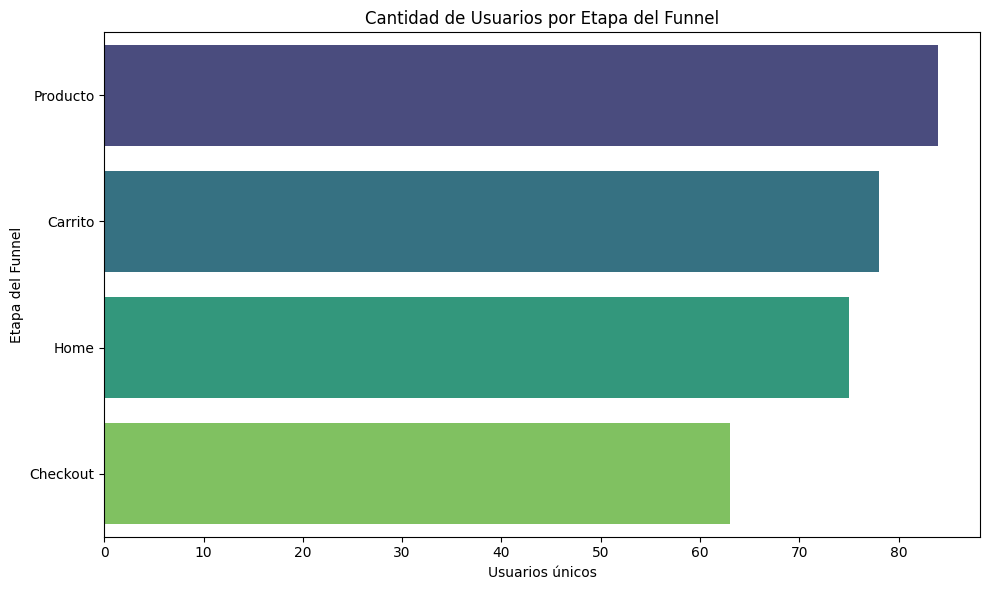

In [6]:
# Calcular cantidad de usuarios por etapa
usuarios_por_etapa = df.groupby('Página_Visitada')['ID_Usuario'].nunique().sort_values(ascending=False)

# Visualizar el funnel
plt.figure(figsize=(10,6))
sns.barplot(x=usuarios_por_etapa.values, y=usuarios_por_etapa.index, palette='viridis')
plt.title('Cantidad de Usuarios por Etapa del Funnel')
plt.xlabel('Usuarios únicos')
plt.ylabel('Etapa del Funnel')
plt.tight_layout()
plt.show()

In [7]:
# Calcular tasa de conversión general
conversion_total = df[df['Conversión'] == 'Sí']['ID_Usuario'].nunique()
usuarios_totales = df['ID_Usuario'].nunique()
tasa_conversion = round((conversion_total / usuarios_totales) * 100, 2)
print(f"\nTasa de conversión general: {tasa_conversion}%")


Tasa de conversión general: 28.67%


In [8]:
# Identificar cuellos de botella (drop-off entre etapas)
etapas_ordenadas = ['Home', 'Producto', 'Carrito', 'Checkout']
usuarios_por_etapa = df[df['Página_Visitada'].isin(etapas_ordenadas)].groupby('Página_Visitada')['ID_Usuario'].nunique()
usuarios_por_etapa = usuarios_por_etapa.reindex(etapas_ordenadas)

print("\nUsuarios únicos por etapa del funnel:")
print(usuarios_por_etapa)

print("\nDrop-off entre etapas:")
for i in range(len(etapas_ordenadas)-1):
    etapa_actual = etapas_ordenadas[i]
    siguiente = etapas_ordenadas[i+1]
    tasa_drop = round(100 - (usuarios_por_etapa[siguiente] / usuarios_por_etapa[etapa_actual]) * 100, 2)
    print(f"De {etapa_actual} a {siguiente}: {tasa_drop}% de abandono")


Usuarios únicos por etapa del funnel:
Página_Visitada
Home        75
Producto    84
Carrito     78
Checkout    63
Name: ID_Usuario, dtype: int64

Drop-off entre etapas:
De Home a Producto: -12.0% de abandono
De Producto a Carrito: 7.14% de abandono
De Carrito a Checkout: 19.23% de abandono


In [11]:
# Cargar datos desde Excel
archivo = 'Practica_Analisis_Marketing.xlsx'
df1 = pd.read_excel(archivo, sheet_name='Campañas')

In [35]:
df1.head()

,Fecha,Campaña,Canal,Impresiones,Clics,CTR (%),Conversiones,CPA,Inversión ($),ROI (%)
0,2024-01-27,Campaña C,Instagram,2054,632,0.93,385,2.26,662.51,156.12
1,2024-01-27,Campaña C,Facebook,6744,351,7.73,100,13.32,268.34,-13.39
2,2024-01-21,Campaña B,Instagram,2900,334,4.03,247,2.41,575.03,158.23
3,2024-01-30,Campaña B,Instagram,7980,326,4.23,273,8.13,403.56,85.07
4,2024-01-28,Campaña B,Facebook,8069,624,7.67,188,16.27,678.58,161.17


In [15]:
# Conversión de fechas
df1['Fecha'] = pd.to_datetime(df1['Fecha'])

In [16]:
# Métricas agregadas por campaña
campañas = df1.groupby('Campaña').agg({
    'Impresiones': 'sum',
    'Clics': 'sum',
    'Conversiones': 'sum',
    'Inversión ($)': 'sum'
}).reset_index()

In [19]:
# Calcular métricas clave
campañas['CTR (%)'] = round((campañas['Clics'] / campañas['Impresiones']) * 100, 2)
campañas['CPA ($)'] = round(campañas['Inversión ($)'] / campañas['Conversiones'], 2)
campañas['CPC ($)'] = round(campañas['Inversión ($)'] / campañas['Clics'], 2)
print("\nResumen de campañas:")
print(campañas)



Resumen de campañas:
     Campaña  Impresiones  Clics  Conversiones  Inversión ($)  CTR (%)  \
0  Campaña A       553102  52641         23055       45481.41     9.52   
1  Campaña B       563976  57478         26155       55611.02    10.19   
2  Campaña C       575162  54864         24818       53071.04     9.54   

   CPA ($)  CPC ($)  
0     1.97     0.86  
1     2.13     0.97  
2     2.14     0.97  


C:\Users\Axel\AppData\Local\Temp\ipykernel_13760\3665272117.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=campañas, x='Campaña', y='CTR (%)', palette='Blues_d')


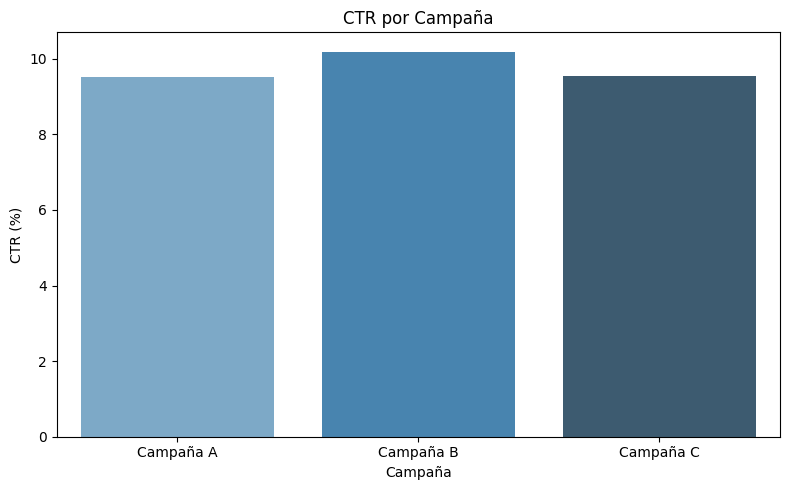

In [20]:
# Visualización: CTR por campaña
plt.figure(figsize=(8,5))
sns.barplot(data=campañas, x='Campaña', y='CTR (%)', palette='Blues_d')
plt.title('CTR por Campaña')
plt.ylabel('CTR (%)')
plt.tight_layout()
plt.show()

C:\Users\Axel\AppData\Local\Temp\ipykernel_13760\1695674547.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=campañas, x='Campaña', y='CPA ($)', palette='Oranges')


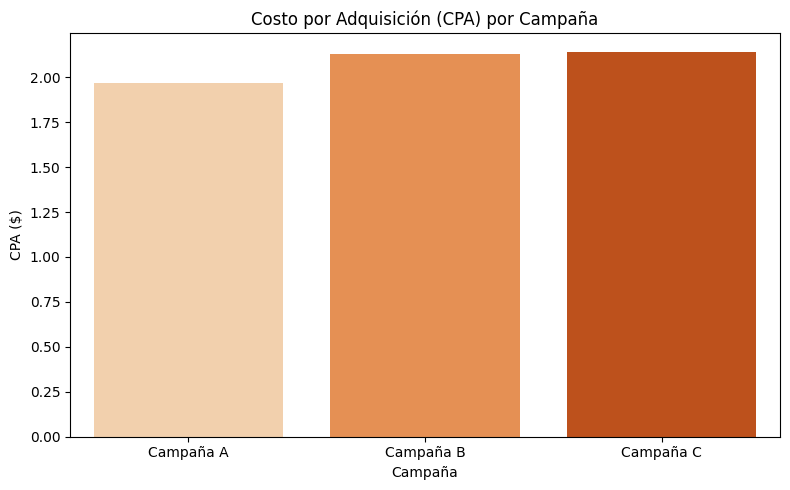

In [21]:
# Visualización: CPA por campaña
plt.figure(figsize=(8,5))
sns.barplot(data=campañas, x='Campaña', y='CPA ($)', palette='Oranges')
plt.title('Costo por Adquisición (CPA) por Campaña')
plt.ylabel('CPA ($)')
plt.tight_layout()
plt.show()

In [22]:
# Agrupado por canal
canales = df1.groupby('Canal').agg({
    'Clics': 'sum',
    'Conversiones': 'sum',
    'Inversión ($)': 'sum'
}).reset_index()
canales['CPA ($)'] = round(canales['Inversión ($)'] / canales['Conversiones'], 2)

print("\nResumen por canal:")
print(canales)


Resumen por canal:
        Canal  Clics  Conversiones  Inversión ($)  CPA ($)
0    Facebook  47551         21242       42751.10     2.01
1  Google Ads  63621         27309       59661.65     2.18
2   Instagram  53811         25477       51750.72     2.03


C:\Users\Axel\AppData\Local\Temp\ipykernel_13760\4041492775.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=canales, x='Canal', y='CPA ($)', palette='Greens')


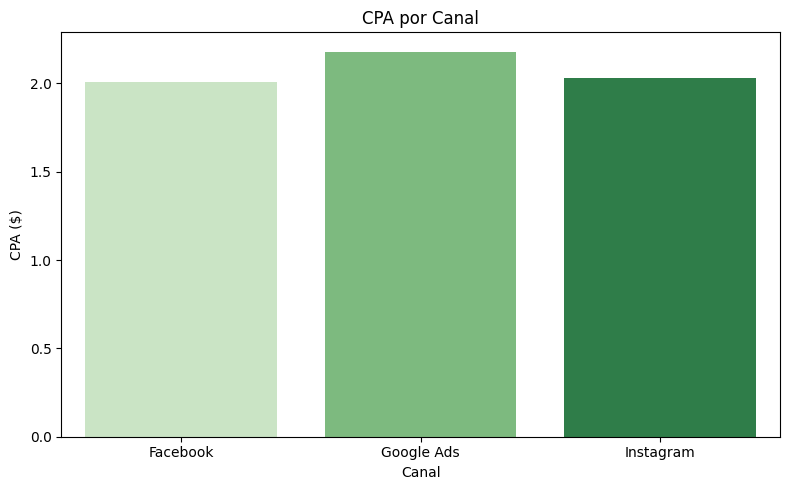

In [23]:
# Visualizar CPA por canal
plt.figure(figsize=(8,5))
sns.barplot(data=canales, x='Canal', y='CPA ($)', palette='Greens')
plt.title('CPA por Canal')
plt.ylabel('CPA ($)')
plt.tight_layout()
plt.show()

In [25]:
# Cargar datos
archivo = 'Practica_Analisis_Marketing.xlsx'
df2 = pd.read_excel(archivo, sheet_name='Benchmark')


In [34]:
df2.head()

,Competidor,Producto/Servicio,Precio,Tiempo_entrega,Valoración,Región,Fecha_de_Análisis,Fuente
0,Empresa X,Plan Pro,26.42,6,4.5,Centro,2024-02-11,Encuesta
1,Empresa X,Plan Pro,96.87,1,3.9,Sur,2024-02-05,Redes Sociales
2,Empresa X,Plan Básico,48.54,9,3.5,Sur,2024-01-27,Encuesta
3,Empresa Y,Plan Pro,66.88,5,4.2,Sur,2024-02-27,Encuesta
4,Empresa Z,Plan Básico,75.35,5,3.1,Norte,2024-02-15,Web


In [27]:
# Promedio de precios por competidor
precio_promedio = df2.groupby('Competidor')['Precio'].mean().sort_values()

print("\nPrecio promedio por competidor:")
print(precio_promedio)


Precio promedio por competidor:
Competidor
Empresa Y    55.043922
Empresa Z    58.692661
Empresa X    58.739438
Name: Precio, dtype: float64


C:\Users\Axel\AppData\Local\Temp\ipykernel_13760\3659614246.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=precio_promedio.values, y=precio_promedio.index, palette='coolwarm')


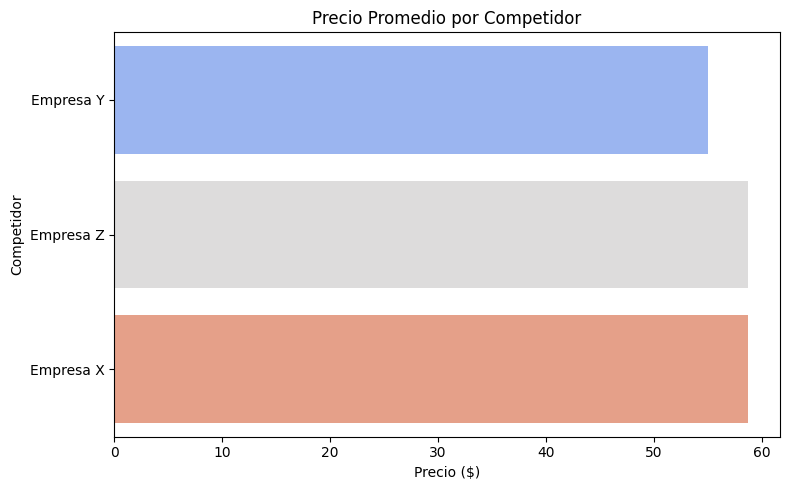

In [28]:
# Visualizar
plt.figure(figsize=(8,5))
sns.barplot(x=precio_promedio.values, y=precio_promedio.index, palette='coolwarm')
plt.title('Precio Promedio por Competidor')
plt.xlabel('Precio ($)')
plt.ylabel('Competidor')
plt.tight_layout()
plt.show()

In [29]:
# Valoración promedio por servicio
valoracion = df2.groupby('Producto/Servicio')['Valoración'].mean().sort_values(ascending=False)
print("\nValoración promedio por tipo de servicio:")
print(valoracion)


Valoración promedio por tipo de servicio:
Producto/Servicio
Plan Premium    4.016000
Plan Pro        3.993407
Plan Básico     3.967890
Name: Valoración, dtype: float64


C:\Users\Axel\AppData\Local\Temp\ipykernel_13760\2667807109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valoracion.values, y=valoracion.index, palette='magma')


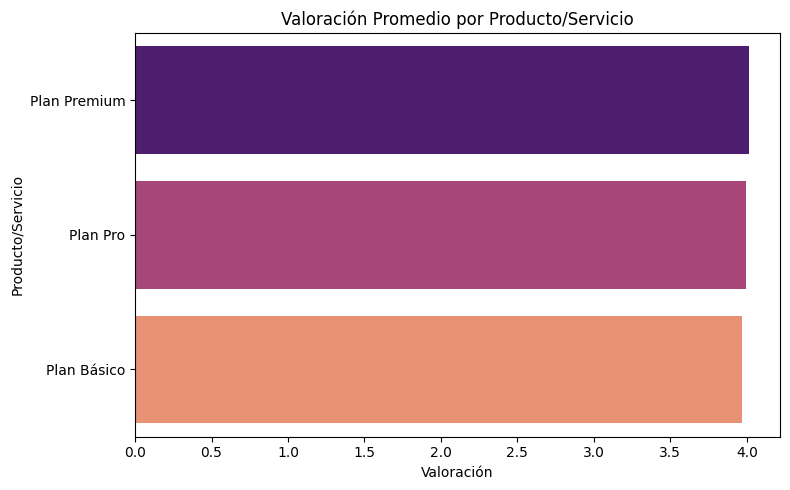

In [30]:
# Visualizar
plt.figure(figsize=(8,5))
sns.barplot(x=valoracion.values, y=valoracion.index, palette='magma')
plt.title('Valoración Promedio por Producto/Servicio')
plt.xlabel('Valoración')
plt.ylabel('Producto/Servicio')
plt.tight_layout()
plt.show()


Precio promedio por región:
Región
Centro    54.7877
Norte     57.4473
Sur       60.1629
Name: Precio, dtype: float64


C:\Users\Axel\AppData\Local\Temp\ipykernel_13760\3586332567.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_precios.index, y=region_precios.values, palette='Set2')


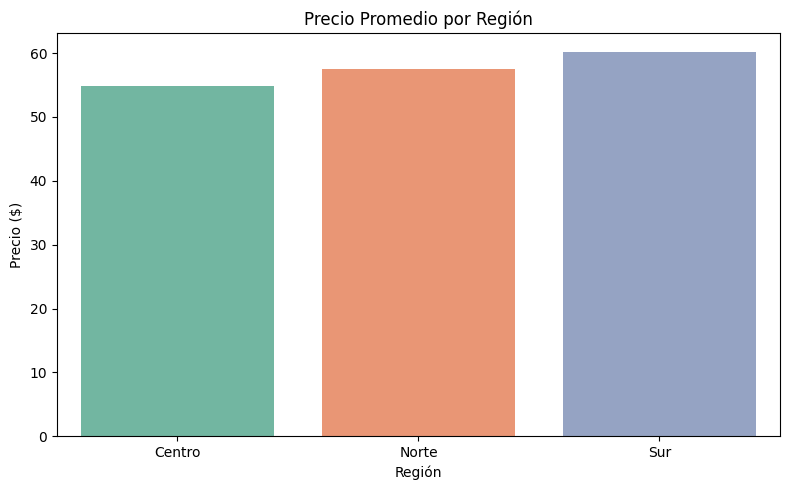

In [31]:
# Comparación por región
region_precios = df2.groupby('Región')['Precio'].mean().sort_values()
print("\nPrecio promedio por región:")
print(region_precios)

plt.figure(figsize=(8,5))
sns.barplot(x=region_precios.index, y=region_precios.values, palette='Set2')
plt.title('Precio Promedio por Región')
plt.ylabel('Precio ($)')
plt.tight_layout()
plt.show()

In [32]:
# Agrupar por semana
df_semana = df1.set_index('Fecha').resample('W').agg({
    'Impresiones': 'sum',
    'Clics': 'sum',
    'Conversiones': 'sum',
    'Inversión ($)': 'sum'
}).reset_index()

In [33]:
# Calcular CTR semanal
df_semana['CTR (%)'] = round((df_semana['Clics'] / df_semana['Impresiones']) * 100, 2)

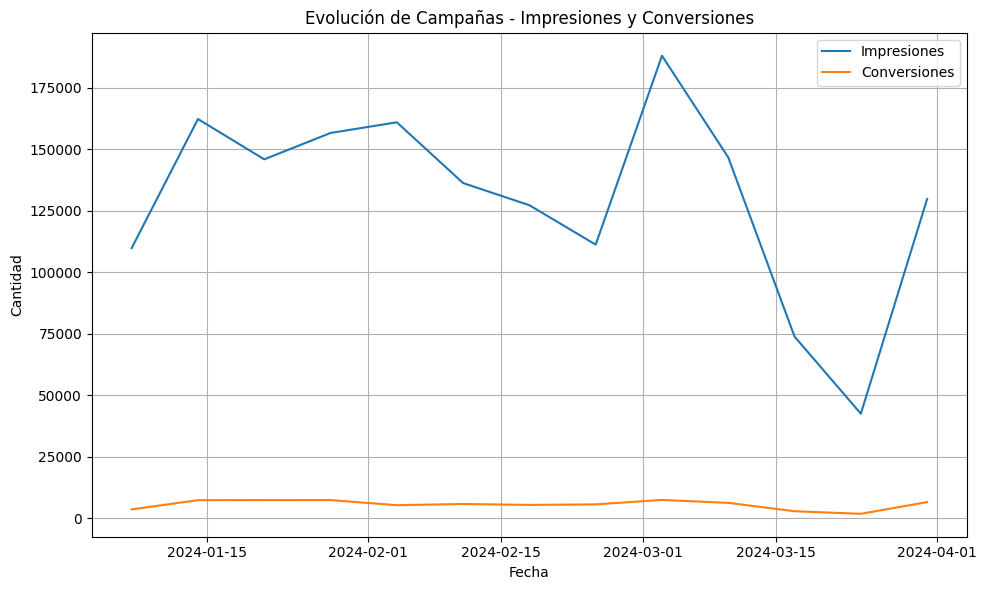

In [36]:

# Graficar impresiones y conversiones
plt.figure(figsize=(10,6))
plt.plot(df_semana['Fecha'], df_semana['Impresiones'], label='Impresiones')
plt.plot(df_semana['Fecha'], df_semana['Conversiones'], label='Conversiones')
plt.title('Evolución de Campañas - Impresiones y Conversiones')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

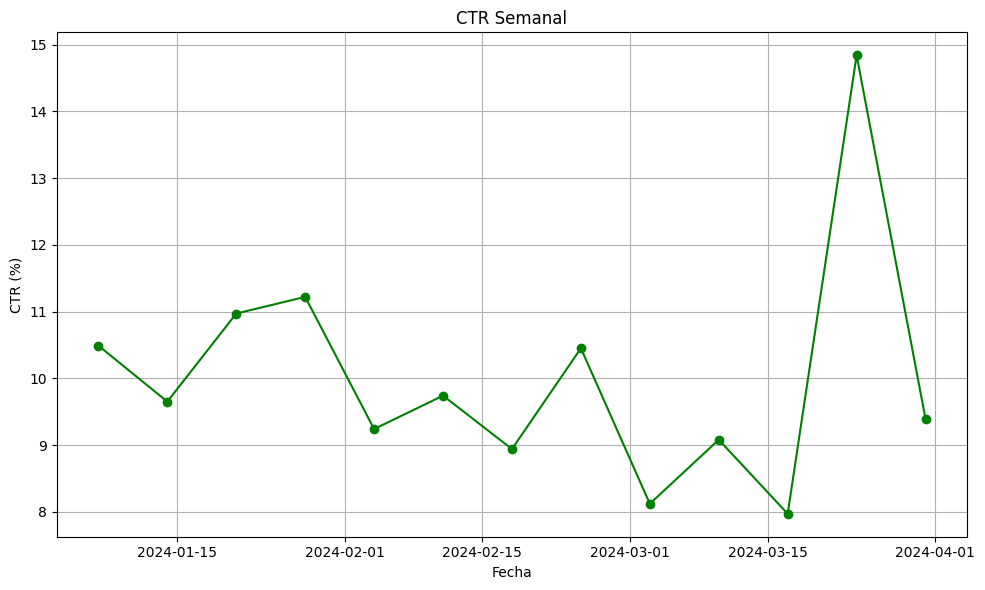

In [37]:
# Graficar CTR
plt.figure(figsize=(10,6))
plt.plot(df_semana['Fecha'], df_semana['CTR (%)'], marker='o', color='green')
plt.title('CTR Semanal')
plt.xlabel('Fecha')
plt.ylabel('CTR (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
# Preparar datos
X = df1[['Inversión ($)']]
y = df1['Conversiones']


In [40]:
# Modelo de regresión
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [41]:
# Predicción
df1['Conversiones_Predichas'] = modelo.predict(X)

# Mostrar resultados
print("\nCoeficiente (slope):", modelo.coef_[0])
print("Intercepto:", modelo.intercept_)


Coeficiente (slope): -0.040721112431745844
Intercepto: 267.68569331579357


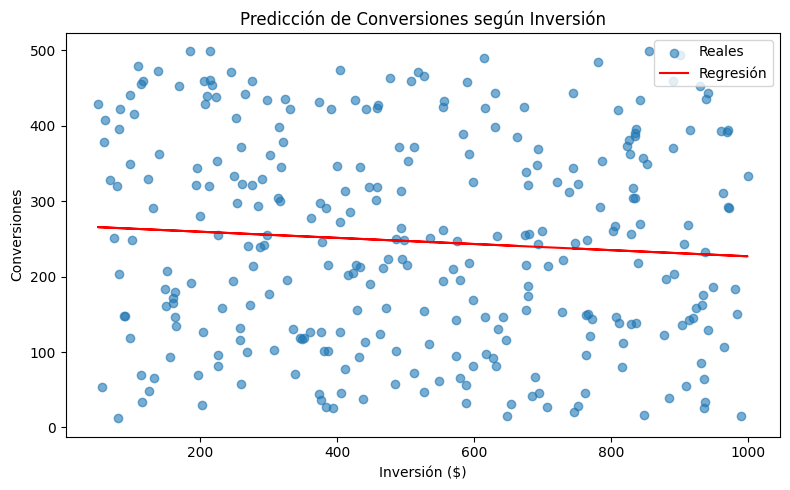

In [42]:
# Gráfico real vs predicción
plt.figure(figsize=(8,5))
plt.scatter(df1['Inversión ($)'], df1['Conversiones'], label='Reales', alpha=0.6)
plt.plot(df1['Inversión ($)'], df1['Conversiones_Predichas'], color='red', label='Regresión')
plt.title('Predicción de Conversiones según Inversión')
plt.xlabel('Inversión ($)')
plt.ylabel('Conversiones')
plt.legend()
plt.tight_layout()
plt.show()